# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [65]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv', delimiter=',')
data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,50.164869,2.514638,2.306626,1.747304,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,7.935285
std,254.768848,1.134552,1.099931,2.716138,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,6.475653
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
max,1991.000000,4.000000,4.000000,50.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [ ]:
# 1. Не все значения столбца age корректны
# 2. Не все значения столбца traveltime корректны
# 3. Столбцы plans_university и past_failures "склеиились"
# 4. В столбцах goout, Dalc, Walc есть пропуски

In [26]:
# 1. Иногда вместо возраста указывали год рождения. Данные собраны за 2006 год, тогда:
data['age'] = np.array([(i if i < 150 else 2006 - i) for i in data['age']])

# 2. Иногда в traveltime, вместо значения от 1 до 4, указано количество минут. Согласно с условием исправим значения:
def f(x):
    if 1 <= x <= 4:
        return x
    elif x < 15:
        return 1
    elif x < 30:
        return 2
    elif x < 60:
        return 3
    else:
        return 4
        
data['traveltime'] = np.array([f(i) for i in data['traveltime']])

# 3. Разделим признаки
data["past_failures"] = np.array([abs(i) % 10 for i in data["plans_universitypast_failures"]])
data = data.rename(columns={"plans_universitypast_failures": "plans_university"})
data["plans_university"] = np.array([int(str(i)[:-1]) for i in data["plans_university"]])

data.describe()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [33]:
# Пустые значения имеют столбцы goout, Dalc, Walc

column_with_NaN = ["goout", "Dalc", "Walc"]

for column in column_with_NaN:
    mask = np.array(data[column].isnull())
    data[column] = [data[column][i] if not mask[i] else data[column].mean() for i in range(data[column].size)]

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174843,0.917715,1.279797,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [36]:
for column in data.columns:
    n = data[column].max() - data[column].min()
    data[column] = np.array([(i - data[column].min()) / n for i in data[column]])

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,0.142857,1.00,1.00,0.000000,0.333333,1.00,0.75,0.75,0.00,0.25,1.00,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,0.285714,1.00,1.00,0.000000,0.000000,1.00,0.50,0.75,0.00,0.25,1.00,0.0,1.0,0.0,1.0,1.0,1.0,0.0
2,0.142857,0.25,0.25,0.333333,0.000000,0.75,1.00,1.00,0.25,0.75,1.00,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0.428571,0.25,0.50,0.333333,0.000000,0.50,0.75,0.75,0.25,0.75,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.285714,0.50,0.25,0.333333,0.333333,0.75,0.25,1.00,0.00,0.25,1.00,0.0,0.0,0.0,1.0,1.0,1.0,0.0


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate

fin_grades = pd.read_csv('scores.csv', delimiter=',')

model = LinearRegression()
kf = KFold(n_splits=4)

result = cross_validate(model, data.values[1:], fin_grades.values, cv = kf, scoring='r2')
result['test_score']



array([0.26834438, 0.27660281, 0.12853096, 0.22032235])

### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [61]:
data['attendance'] = np.array([i.count('+') for i in pd.read_csv('attendance.csv', delimiter=",").values.reshape(649,)])

school_support = np.zeros(649)

f = open("school_support.txt")
for i in f.readlines():
    school_support[int(i) - 1] = 1

data['school_support'] = school_support

for column in ('attendance', 'school_support'):
    n = data[column].max() - data[column].min()
    data[column] = np.array([(i - data[column].min()) / n for i in data[column]])

data.describe()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960,0.885641,0.104777
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745,0.145024,0.306502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812500,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.937500,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance,school_support
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546682,0.124413,0.321540,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960,0.885641,0.104777
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293711,0.229429,0.319949,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745,0.145024,0.306502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812500,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.937500,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


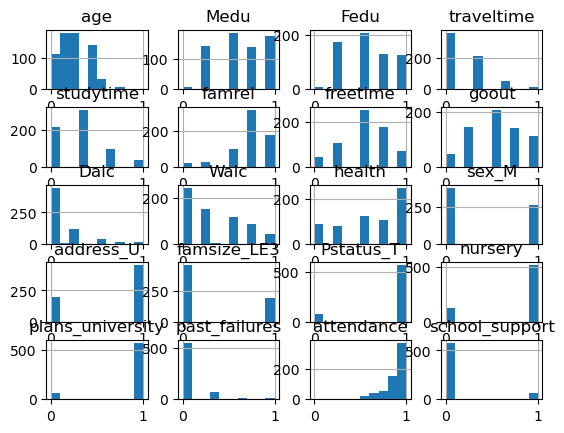

In [64]:
data.hist(bins=10)
data.describe()

In [ ]:
# данные правдоподобны

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [3]:
import sklearn
from sklearn import linear_model
regression = linear_model.LinearRegression().fit(data, result) #create model and train it
prediction = #calculate prediction for one object for vector x
error = (prediction - y)**2 #simple error - square error

SyntaxError: invalid syntax (3289234131.py, line 4)

In [1]:
# Your code here
# ...

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [ ]:
# Your code here
# ...